Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(43)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Data Collection and Preprocessing

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
# Shape of the arrays
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
# Printing an image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
# Display the image
cv2_imshow(x_train[10])

# Printing the corresponding lable
print(y_train[10])

3


In [7]:
print(x_train[10].shape)

(28, 28)


Image Lables

In [8]:
# Unique values in y train
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
# Unique values in y test
print(np.unique(y_test))


[0 1 2 3 4 5 6 7 8 9]


Scaling the data

In [12]:
x_train= x_train/255
x_test= x_test/255

Building the Nural Network

In [13]:
# Setting the layers of the Nural Network
model= keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128,activation='relu'),
                         keras.layers.Dense(128,activation='relu'),
                         keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Compiling the Neural Network
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Training the Neural Network
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8788 - loss: 0.4115
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9664 - loss: 0.1092
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9779 - loss: 0.0716
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9846 - loss: 0.0499
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9871 - loss: 0.0397
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9892 - loss: 0.0321
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9909 - loss: 0.0273
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9922 - loss: 0.0219
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9916 - loss: 0.0225
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9932 - loss: 0.0190


Accuracy on test data

In [17]:
# Accuracy on test Data
loss, accuracy= model.evaluate(x_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.1347
0.9763000011444092


Accuracy = 97.6%

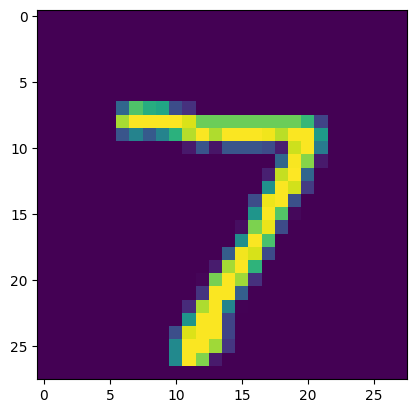

In [20]:
# Display the image
plt.imshow(x_test[0])
plt.show()

In [21]:
print(y_test[0])

7


In [22]:
y_pred= model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
print(y_pred.shape)

(10000, 10)


In [24]:
print(y_pred[0])

[9.7820477e-05 1.2161885e-03 3.8186032e-02 7.1521723e-01 3.1960746e-05
 1.8790416e-06 3.1205558e-09 9.9998319e-01 5.6221808e-04 9.9718517e-01]


In [25]:
# Converting the prediction to calss lables
lable_for_first_image= np.argmax(y_pred[0])
print(lable_for_first_image)

7


In [26]:
# Converting the prediction to class lables for all test data points
y_pred_labels= [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

y_test --> True Lables<br>
y_pred_labels --> Predicted lables

In [28]:
# Confusin Matrix
conf_mat= confusion_matrix(y_test, y_pred_labels)


In [29]:
print(conf_mat)

tf.Tensor(
[[ 969    0    0    0    1    0    4    0    2    4]
 [   0 1129    3    1    0    0    1    0    1    0]
 [   1    4 1002    3    2    0    1    4   15    0]
 [   0    0    4  988    1    2    0    4    7    4]
 [   1    0    3    0  956    0    3    1    2   16]
 [   2    0    0   14    1  851   10    0   12    2]
 [   2    3    1    1    5    1  941    0    4    0]
 [   0    4    5    2    1    0    1  981    6   28]
 [   0    0    1    2    4    1    1    2  957    6]
 [   1    2    0    4    3    4    1    1    4  989]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

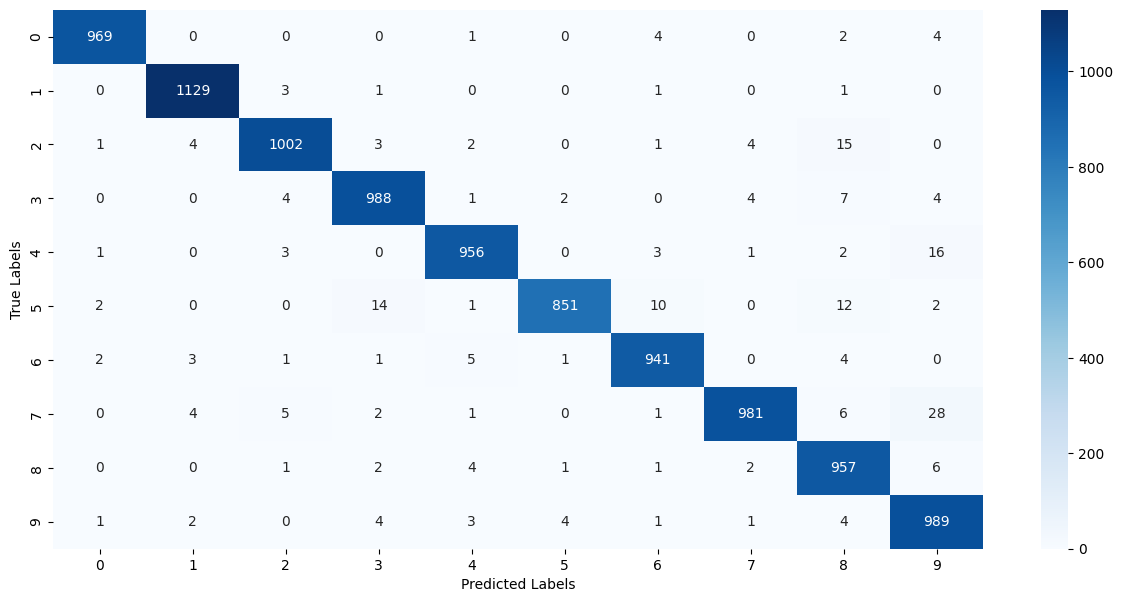

In [35]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')


Building Predictive System

Enter the path of the image that you want to predict :/content/Number.png


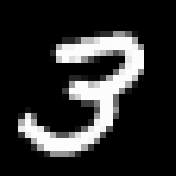

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The Handwritten Digit is predicted as : 3


In [63]:
# Taking the input
input_image_path= input("Enter the path of the image that you want to predict :")

# reading the image
input_image= cv2.imread(input_image_path)
cv2_imshow(input_image)

# Converting the RGB image to grey scale
grey_scale= cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

# Resizing the image to match dimensions of the trained data
input_image_resize= cv2.resize(grey_scale, (28,28))
input_image_resize= input_image_resize/255

# Feeding one input to the Neural Network
image_reshape= np.reshape(input_image_resize, [1,28,28])

input_prediction= model.predict(image_reshape)
# print(input_prediction)

input_predict_lable = np.argmax(input_prediction)
print("The Handwritten Digit is predicted as :",input_predict_lable)